In [25]:
# !pip install tensorflow==2.9.0
# !pip install opencv-python==4.5.5.64
# !pip install numpy==1.19.2
# !pip install pandas==1.3.2
# !pip install scipy==1.7.1

In [26]:
import cv2
from color_recognition_api import color_histogram_feature_extraction
from color_recognition_api import knn_classifier
import os
import os.path

In [27]:
directory_path = './data'  # Replace with your directory path
output_directory_path = './results'  # Replace with your desired output directory path


# checking whether the training data is ready
PATH = './training.data'
if os.path.isfile(PATH) and os.access(PATH, os.R_OK):
    print('Almost Done...')
else:
    print('training data is being created...')
    open('training.data', 'w')
    color_histogram_feature_extraction.training()


Almost Done...


In [28]:
    for filename in os.listdir(directory_path):
        # Check if the file is an image
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # read the test image
            source_image = cv2.imread(os.path.join(directory_path, filename))
            prediction = 'n.a.'
            # get the prediction
            color_histogram_feature_extraction.color_histogram_of_test_image(source_image)
            prediction = knn_classifier.main('training.data', 'test.data')
            if prediction == "fair":
                text = "B.D"
            else:
                text = "N.B.D"
            cv2.putText(
                source_image,
                text,
                (15, 45),
                cv2.FONT_HERSHEY_PLAIN,
                3,
                200,
                5
            )


            output_filepath = os.path.join(output_directory_path, filename)
            cv2.imwrite(output_filepath, source_image)
            print(f"Saved: {output_filepath}")


Saved: ./results\brain coral (1).jpg
Saved: ./results\branching (48).jpg
Saved: ./results\stag_bleach.jpg
Saved: ./results\test.jpg


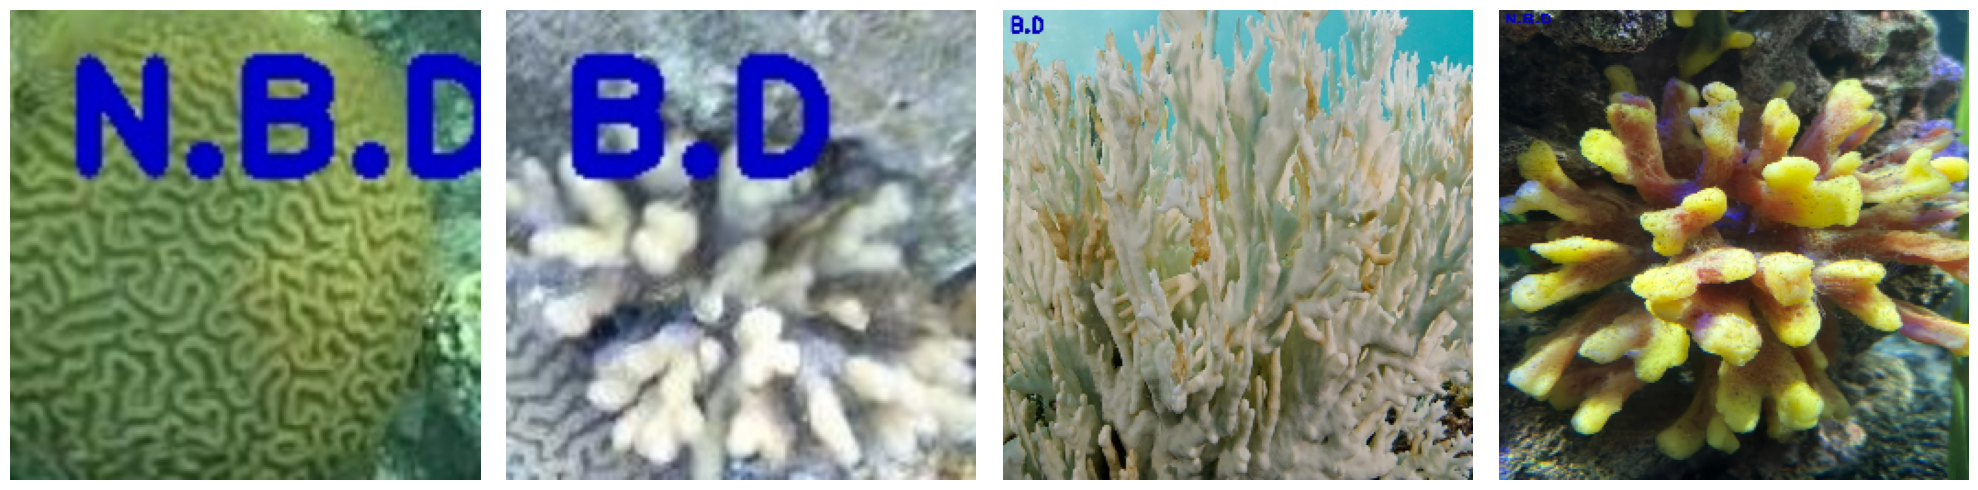

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the directory path
directory_path = './results'  # Replace with your directory path

# List all files in the directory
image_files = [f for f in os.listdir(directory_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Create a figure to display the images
plt.figure(figsize=(len(image_files) * 5, 5))  # Adjust the figure size based on the number of images

# Loop through each image file, resize it and display it
for i, image_file in enumerate(image_files, start=1):
    img_path = os.path.join(directory_path, image_file)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (256, 256))
    
    # Convert image from BGR to RGB (as OpenCV loads images in BGR format by default)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, len(image_files), i)  # 1 row, 'len(image_files)' columns, 'i'-th plot
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes for better visualization

plt.tight_layout()
plt.show()
